Lab01-2
======

## 클러스터링 연습문제
이번 실습 수업에 배운 클러스터링의 연습 문제로 Abalone data, 전복 데이터를 클러스터링 해보겠습니다.<br>
이전 챕터의 예제 코드를 기반으로 클러스터링을 진행하시면 되겠습니다.<br>
k-means, Hierarchical 중 맘에 드는 알고리즘을 사용해보시고, 주어진 시각화 코드를 사용해 시각화를 해보세요.<br>

In [1]:
from os.path import join
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import random
import time

datapath = join('data','abalone.txt')
labelpath = join('data','abalone_attributes.txt')

columns = list()
with open(labelpath, 'r') as f:
    columns = f.read().split('\n')

## 1. 데이터 살펴보기
전복 데이터는 9개의 컬럼으로 이루어진 데이터 입니다.<br>
9개의 컬럼 중 하나의 컬럼은 성별(남,여,유아기)를 기준으로 분류를 진행할 수도 있습니다.<br>
하지만, 이번 수업에서는 클러스터링을 진행해 보겠습니다.<br>
데이터를 살펴보기 쉽게 pandas DataFrame으로 읽습니다.<br><br>

### Feature Description 
1. Sex : 성별
2. Length : 껍질의 가장 긴 길이
3. Diameter : 길이의 수직 길이 (직경)
4. Height : 껍질의 높이
5. Whole weight : 전체 중량
6. Shucked weight : 살 중량 
7. Viscera weight : 내장 중량
8. Shell weight : 껍질 중량
9. Rings : 1.5년마다 증가하는 링의 수

In [2]:
data = pd.read_csv(datapath, names = columns)

DataFrame.head() 함수로 처음 5개의 데이터를 살펴볼 수 있습니다.

In [3]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


 ## 2. 간단한 전처리와 준비

전복 데이터는 9개의 컬럼을 가지고 있고, 하나의 데이터(행)는 9개의 차원으로 이루어진 벡터라고 볼 수 있습니다. <br>
9차원은 우리 눈으로 볼 수 있도록 표현하기 어려우므로 두개의 컬럼을 선택해 시각화할 수 있도록 해보세요.<br>
또한, 클러스터링에서 사용하는 거리 측정 방식은 수치 데이터에만 적용할 수 있으므로 범주 형 변수인 성별 변수는 제거하고,<br> 각 변수들의 값의 범위를 min-max 정규화를 통해 조정해주겠습니다.

In [4]:
del data['Sex']

In [5]:
for dim in data.columns:
        data[dim] -= np.min(data[dim])
        data[dim] /= np.max(data[dim])

In [6]:
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286


#### 모델의 입력으로 사용할 X 변수에 2개의 컬럼을 선택해 2차원 데이터를 만들어 주세요.
힌트 : X = np.array(pd.concat([data['첫 번째 컬럼'] ,data['두 번째 컬럼']],axis=1))

In [13]:
X = np.array(pd.concat([data['Length'],data['Diameter']],axis=1))
print(X)

[[0.51351351 0.5210084 ]
 [0.37162162 0.35294118]
 [0.61486486 0.61344538]
 ...
 [0.70945946 0.70588235]
 [0.74324324 0.72268908]
 [0.85810811 0.84033613]]


## 3. Sklearn을 사용해 자유롭게 클러스터링 해보기
클러스터의 개수를 자유롭게 지정해 주세요.<br>
클러스터링을 진행하여 얻은 클러스터 번호는 반드시 labels 변수에 저장해주세요.

In [17]:
# 클러스터의 개수
n_clusters = 3

# Skelarn 모델 정의
model = KMeans(n_clusters)

# 클러스터 생성
my_cluster = model.fit(X)

# 클러스터 번호 할당
labels = my_cluster.predict(X)

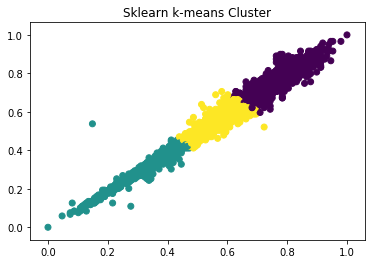

In [18]:
#시각화 코드
plt.scatter(X[:,0], X[:,1], c=labels)
plt.title('Sklearn k-means Cluster')
plt.show()

## 4. 클러스터링 결과
클러스터링된 결과와 클러스터에 사용된 두 변수들의 평균을 비교해 보겠습니다.

In [19]:
#labels numpy 배열로부터 특정한 클러스터에 할당된 점의 인덱스를 뽑아 점을 선택합니다.
clusters = list()
for i in range(n_clusters):
    clusters.append(X[labels == i])

In [20]:
for i, x_c in enumerate(clusters):
    print('{}번 클러스터의 첫 번째 변수 평균 : {:.2f} 두 번째 변수의 평균 : {:.2f}'.format(
                                                i,
                                                np.mean(x_c[:,0]), 
                                                np.mean(x_c[:,1])))

0번 클러스터의 첫 번째 변수 평균 : 0.75 두 번째 변수의 평균 : 0.74
1번 클러스터의 첫 번째 변수 평균 : 0.34 두 번째 변수의 평균 : 0.32
2번 클러스터의 첫 번째 변수 평균 : 0.57 두 번째 변수의 평균 : 0.55


## 5. 클러스터 평가하기
클러스터 평가 방법인 실루엣 스코어를 사용해 클러스터가 잘 되었는지 확인해 보겠습니다.

클러스터의 수 = 3, 평균 실루엣 score : 0.540


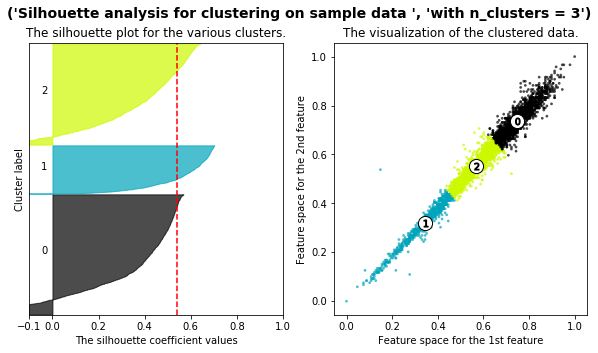

In [21]:
silhouette_avg = silhouette_score(X, labels)
sample_silhouette_values = silhouette_samples(data, labels)

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_size_inches(10, 5)
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

def get_centroid(data, label, n_clusters):
    centroid = list()
    for i in range(n_clusters):
        x = data[label == i][:,0]
        y = data[label == i][:,1]
        x = np.mean(x)
        y = np.mean(y)
        centroid.append([x,y])
    return np.array(centroid)


y_lower = 10
for i in range(n_clusters):
    # 클러스터 i 에 속한 샘플들의 실루엣 점수를 모아 점수에 따라 정렬합니다.
    ith_cluster_silhouette_values = \
        sample_silhouette_values[labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # 실루엣 plot에 클러스터 라벨을 달아줍니다.
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # 다음 클러스터의 실루엣 plot을 그리기 위해 간격을 추가합니다.
    y_lower = y_upper + 10 
ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
# 평균 실루엣 score를 표시할 빨간 세로 점선을 그려줍니다.
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # y축에 표시되는 값들을 제거해줍니다.
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 두 번째 그림은 실제로 클러스터링 된 데이터를 보여줍니다
colors = cm.nipy_spectral(labels.astype(float) / n_clusters)
ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
            c=colors, edgecolor='k')

# 클러스터에 라벨을 달아주기 위해 중심점을 얻어냅니다. 
centers = get_centroid(X, labels, n_clusters)
# 각 클러스터 중심점에 클러스터 라벨을 달아줍니다.
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for clustering on sample data ",
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')
print("클러스터의 수 = {}, 평균 실루엣 score : {:.3f}".format(n_clusters,silhouette_avg))
plt.show()

실루엣 점수가 0.5가 넘으셨나요? 넘지 않으셨다면, 클러스터링 모델을 조정하거나 변수를 변경하여 0.5를 달성해 보세요.